<a href="https://colab.research.google.com/github/BalthazazarDuc/Data-Science-Machine-Learning/blob/Balt/merged_result_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/BalthazazarDuc/Data-Science-Machine-Learning/results/19_results_merged.csv')

In [24]:
# Step 1: Calculate which group each row belongs to
df['group'] = df.index // 1200  # Integer division to get the group number

# Step 2: Pivot the DataFrame
result_df = df.pivot(index='id', columns='group', values='difficulty')
result_df.columns = [f'difficulty_{i}' for i in range(result_df.columns.size)]  # Rename columns for clarity


In [25]:
result_df

,difficulty_0,difficulty_1,difficulty_2,difficulty_3,difficulty_4,difficulty_5,difficulty_6,difficulty_7,difficulty_8,difficulty_9,difficulty_10,difficulty_11,difficulty_12,difficulty_13,difficulty_14,difficulty_15,difficulty_16,difficulty_17,difficulty_18
id,,,,,,,,,,,,,,,,,,,
0,C2,C2,C2,C2,B2,C2,C1,C1,C1,C2,C2,C2,C2,C2,C2,A1,C2,C2,C2
1,A2,B1,A2,B1,C1,A2,A2,B1,B1,B1,B1,B1,B1,B1,B1,B1,B1,A2,A2
2,B1,B1,B1,B1,B1,A1,A1,A1,A1,A1,A1,A1,B1,A1,A1,A1,B1,B1,B1
3,A2,A2,A2,A2,C1,A1,A1,A2,A1,A1,A1,A1,A2,A1,A1,A1,A2,B1,A2
4,C2,C2,C2,C2,C1,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,B1,B1,B1,B1,A1,B1,B1,A1,A2,B1,C2,C2,B1,B1,B1,B1,B1,B1,B1
1196,A2,A2,A2,A2,A1,A2,A2,C1,A2,A2,A2,A2,A2,A2,A1,A2,A2,A2,A2
1197,C2,C2,C2,C2,B2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2,C2


In [26]:
# Mapping difficulties to numbers
difficulty_mapping = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}

# Convert all difficulties to numbers using the mapping
for col in result_df.columns:
    result_df[col] = result_df[col].map(difficulty_mapping)

# Calculate the mean of each row
result_df['mean_difficulty'] = result_df.mean(axis=1)


In [27]:
result_df['mean_difficulty']

id
0       5.473684
1       2.789474
2       1.947368
3       1.736842
4       5.947368
          ...   
1195    3.052632
1196    2.052632
1197    5.894737
1198    3.789474
1199    4.421053
Name: mean_difficulty, Length: 1200, dtype: float64

In [28]:
inverse_difficulty_mapping = {1: 'A1', 2: 'A2', 3: 'B1', 4: 'B2', 5: 'C1', 6: 'C2'}

# Define a function to find the closest difficulty level based on the mean
def find_closest_difficulty(mean):
    closest_num = min(inverse_difficulty_mapping.keys(), key=lambda x: abs(x - mean))
    return inverse_difficulty_mapping[closest_num]

# Apply the function to the mean_difficulty column
result_df['difficulty'] = result_df['mean_difficulty'].apply(find_closest_difficulty)
result_df.reset_index(inplace=True)
# Display the result
print(result_df[['mean_difficulty', 'difficulty']])

      mean_difficulty difficulty
0            5.473684         C1
1            2.789474         B1
2            1.947368         A2
3            1.736842         A2
4            5.947368         C2
...               ...        ...
1195         3.052632         B1
1196         2.052632         A2
1197         5.894737         C2
1198         3.789474         B2
1199         4.421053         B2

[1200 rows x 2 columns]


In [29]:
result_df

,id,difficulty_0,difficulty_1,difficulty_2,difficulty_3,difficulty_4,difficulty_5,difficulty_6,difficulty_7,difficulty_8,...,difficulty_11,difficulty_12,difficulty_13,difficulty_14,difficulty_15,difficulty_16,difficulty_17,difficulty_18,mean_difficulty,difficulty
0,0,6,6,6,6,4,6,5,5,5,...,6,6,6,6,1,6,6,6,5.473684,C1
1,1,2,3,2,3,5,2,2,3,3,...,3,3,3,3,3,3,2,2,2.789474,B1
2,2,3,3,3,3,3,1,1,1,1,...,1,3,1,1,1,3,3,3,1.947368,A2
3,3,2,2,2,2,5,1,1,2,1,...,1,2,1,1,1,2,3,2,1.736842,A2
4,4,6,6,6,6,5,6,6,6,6,...,6,6,6,6,6,6,6,6,5.947368,C2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,3,3,3,3,1,3,3,1,2,...,6,3,3,3,3,3,3,3,3.052632,B1
1196,1196,2,2,2,2,1,2,2,5,2,...,2,2,2,1,2,2,2,2,2.052632,A2
1197,1197,6,6,6,6,4,6,6,6,6,...,6,6,6,6,6,6,6,6,5.894737,C2
1198,1198,4,4,4,4,3,5,4,5,4,...,5,4,5,1,1,3,3,3,3.789474,B2


In [30]:
results = result_df[['id', 'difficulty']]


In [31]:
results

,id,difficulty
0,0,C1
1,1,B1
2,2,A2
3,3,A2
4,4,C2
...,...,...
1195,1195,B1
1196,1196,A2
1197,1197,C2
1198,1198,B2


from matplotlib import pyplot as plt
results['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('difficulty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('difficulty')):
  _plot_series(series, series_name, i)
  fig.legend(title='difficulty', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['difficulty'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='id', y='difficulty', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

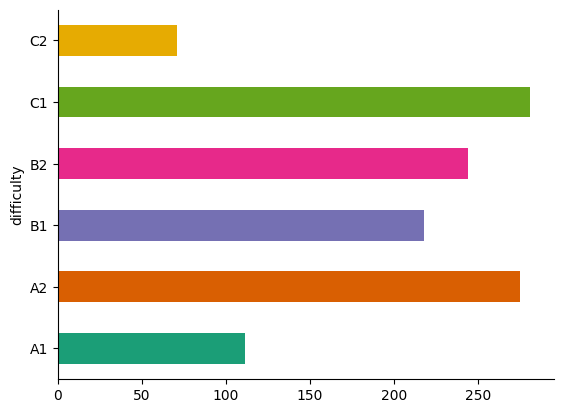

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('difficulty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
results.groupby('difficulty').size()

difficulty
A1    111
A2    275
B1    218
B2    244
C1    281
C2     71
dtype: int64

In [32]:
# Now, extended_data is ready to be used for training your model
results.to_csv('result_with_merged_results.csv', index=False)